In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv('data/Social_Network_Ads.csv').values

In [14]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
adaB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                          n_estimators=10,
                          learning_rate=0.8,
                          algorithm='SAMME.R',   # default
                          random_state=2)
# weak classifier: DecisionTreeClassifier→ stump이므로 max_depth를 1로 설정
#                  (DecisionTree 외 타 classifier 사용 가능)
# 이론적으로 n_estimators가 클 수록 좋은 결과를 기대할 수 있음
# weak classifier인 DecisionTreeClassifier의 성능을 향상시킬 경우(max_depth를 키움)
# overfitting의 위험성이 있음

In [18]:
adaB.fit(xTrain,yTrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.8, n_estimators=10, random_state=2)

In [19]:
# sample predict
adaB.predict([[42,90000]])

array([1])

In [20]:
yTrainPred = adaB.predict(xTrain)
yTestPred = adaB.predict(xTest)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
trainCM = confusion_matrix(yTrain,yTrainPred)
testCM = confusion_matrix(yTest,yTestPred)
trainAcc = accuracy_score(yTrain,yTrainPred)
testAcc = accuracy_score(yTest,yTestPred)
print('[Confusion Matrix]')
print('* train\n',trainCM)
print('* test\n',testCM)
print('[Accuracy]')
print('* train\n',round(trainAcc*100,2),'%')
print('* test\n',round(testAcc*100,2),'%')

[Confusion Matrix]
* train
 [[197  12]
 [ 18  93]]
* test
 [[46  2]
 [ 7 25]]
[Accuracy]
* train
 90.62 %
* test
 88.75 %


(250000, 2)


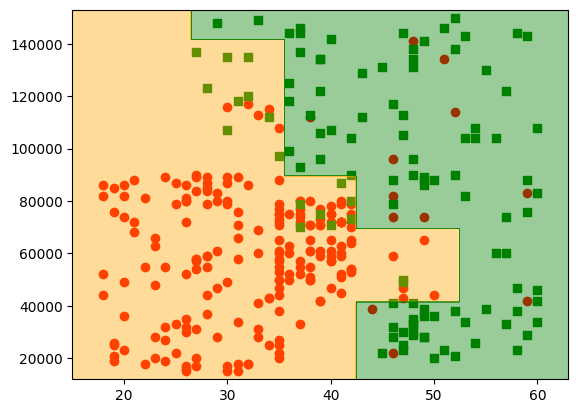

In [22]:
x1min=xTrain[:,0].min()-3
x1max=xTrain[:,0].max()+3
x1=np.linspace(x1min,x1max,500)
x2min=xTrain[:,1].min()-3000
x2max=xTrain[:,1].max()+3000
x2=np.linspace(x2min,x2max,500)

# meshgrid
X1,X2=np.meshgrid(x1,x2)
# 2D인 X1과 X2를 1D로 변환후, xTrain(또는 xTest) 형태로 결합
X1tmp=X1.reshape(-1,1)
X2tmp=X2.reshape(-1,1)
X1X2=np.concatenate((X1tmp,X2tmp),axis=1)
print(X1X2.shape)
# xTrain 및 xTest와 동일한 2D형태 (열의 수는 feature의 수(age,salary))

# X1X2에 대한 prediction
X1X2pred=adaB.predict(X1X2)
# X1X2pred는 X1X2에 대한 결과이므로, (250000,)
# meshgrid에 적용하기 위해 (500,500)으로 변경
X1X2mesh=X1X2pred.reshape(500,500)

xTrain0 = xTrain[yTrain==0,:] # yTest가 0인 xTest
xTrain1 = xTrain[yTrain==1,:] # yTest가 1인 xTest

plt.scatter(xTrain0[:,0],xTrain0[:,1],color='red',marker='o',label='not purchased')
plt.scatter(xTrain1[:,0],xTrain1[:,1],color='green',marker='s',label='purchased')

from matplotlib.colors import ListedColormap
classColor=ListedColormap(('orange','green'))
plt.contourf(X1,X2,X1X2mesh,cmap=classColor,alpha=0.4)

# yTest가 0인 X는 빨간색, 1인 X는 파란색으로 scatter plot할 것

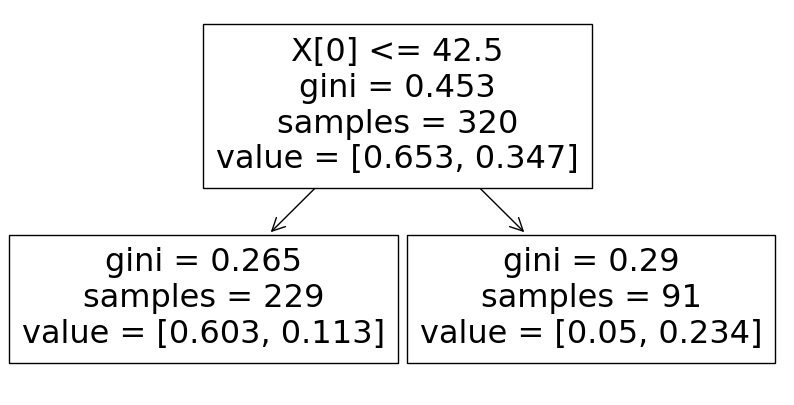

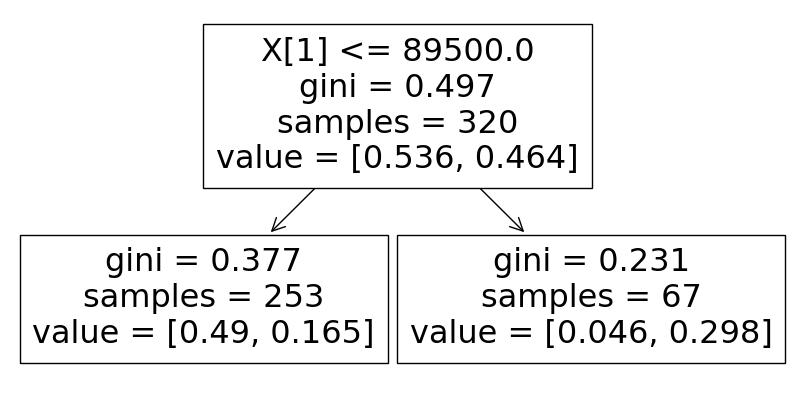

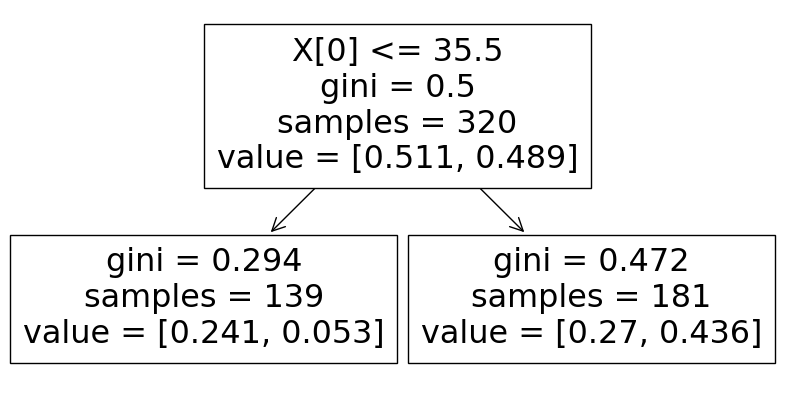

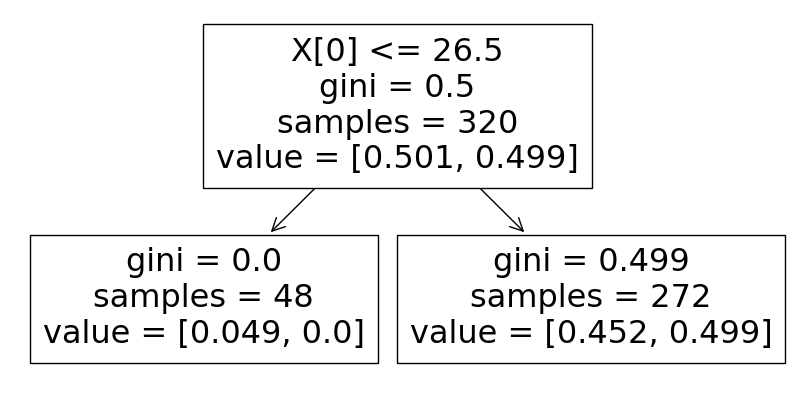

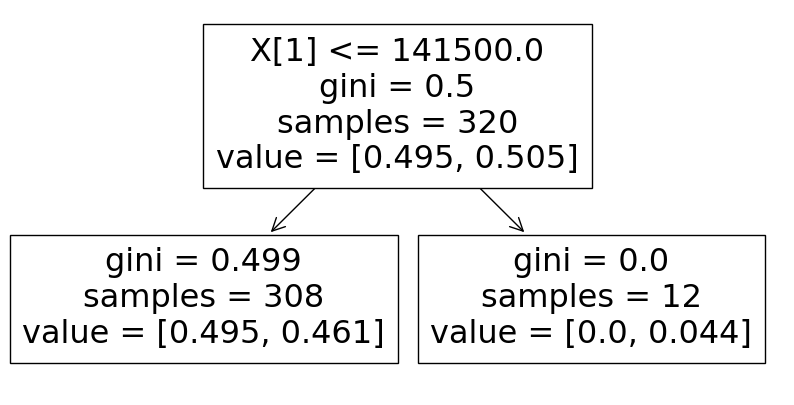

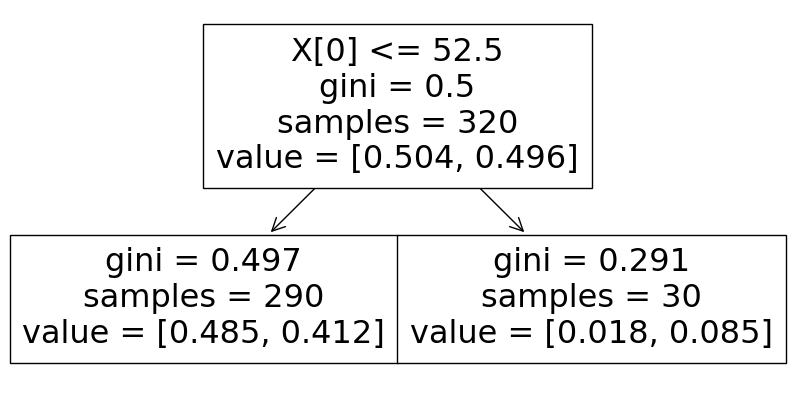

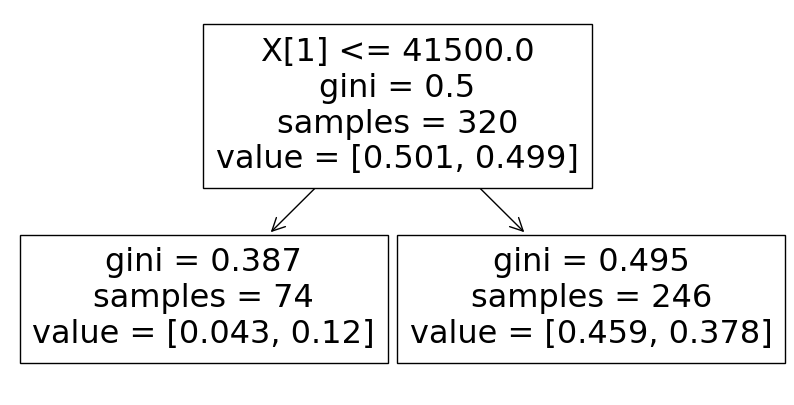

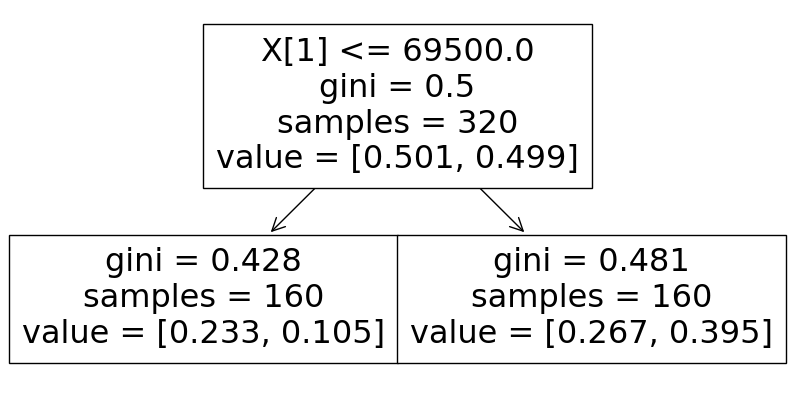

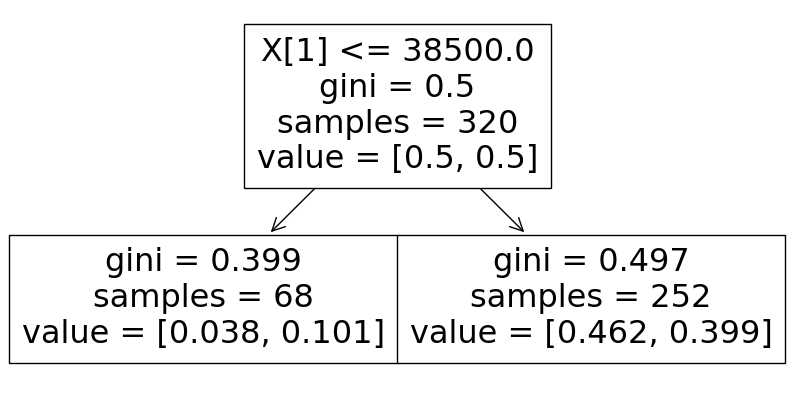

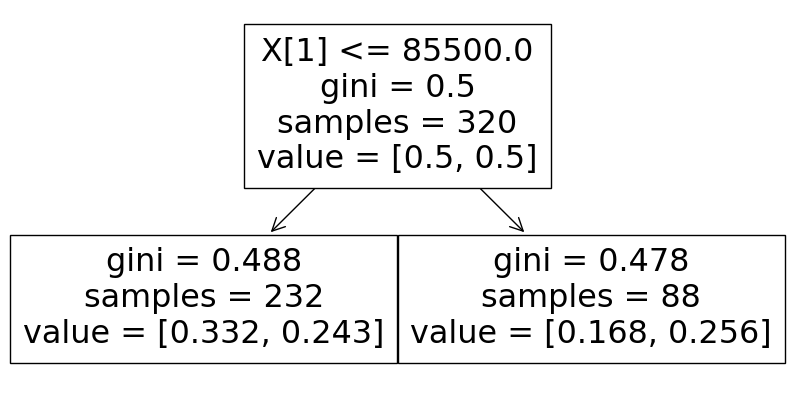

In [23]:
from sklearn.tree import plot_tree
for i in range(10):
    plt.figure(figsize=(10,5))
    plot_tree(adaB.estimators_[i])
    plt.show()

In [24]:
from sklearn.tree import export_text
for i in range(10): 
    print('[',i+1,'th Decision Tree]')
    abText=export_text(adaB.estimators_[i],feature_names=['age','salary'])
    print(abText)

[ 1 th Decision Tree]
|--- age <= 42.50
|   |--- class: 0
|--- age >  42.50
|   |--- class: 1

[ 2 th Decision Tree]
|--- salary <= 89500.00
|   |--- class: 0
|--- salary >  89500.00
|   |--- class: 1

[ 3 th Decision Tree]
|--- age <= 35.50
|   |--- class: 0
|--- age >  35.50
|   |--- class: 1

[ 4 th Decision Tree]
|--- age <= 26.50
|   |--- class: 0
|--- age >  26.50
|   |--- class: 1

[ 5 th Decision Tree]
|--- salary <= 141500.00
|   |--- class: 0
|--- salary >  141500.00
|   |--- class: 1

[ 6 th Decision Tree]
|--- age <= 52.50
|   |--- class: 0
|--- age >  52.50
|   |--- class: 1

[ 7 th Decision Tree]
|--- salary <= 41500.00
|   |--- class: 1
|--- salary >  41500.00
|   |--- class: 0

[ 8 th Decision Tree]
|--- salary <= 69500.00
|   |--- class: 0
|--- salary >  69500.00
|   |--- class: 1

[ 9 th Decision Tree]
|--- salary <= 38500.00
|   |--- class: 1
|--- salary >  38500.00
|   |--- class: 0

[ 10 th Decision Tree]
|--- salary <= 85500.00
|   |--- class: 0
|--- salary >  855

In [25]:
# AdaBoostClassifier.estimators_[i]
# → AdaBoostClassifier를 구성하는 index=i의 weak learner(DecisionTree/Stump)
